In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("FuelExcelChileRenovado.csv",sep=";")

In [11]:
df

,Servicentro,Autoservicio,Precio,Última modificación,Direccion,Comuna,Poblacion,KM2,indh,indh nivel
0,JLC,No Autoservicio,1.016,17-03-2022 16:39,VARGAS FONTECILLA 4193,Quinta Normal,136368,13.0,0.723,Alto
1,JLC,No Autoservicio,1.016,17-03-2022 16:39,SANTA MARGARITA 081,San Bernardo,334836,155.0,0.712,Alto
2,COPEC,No Autoservicio,1.019,17-03-2022 16:12,Lo Sierra 03079,Lo Espejo,103865,7.0,0.657,Medio
3,COPEC,No Autoservicio,1.019,17-03-2022 16:45,Vargas Fontecilla 4182,Quinta Normal,136368,13.0,0.723,Alto
4,COPEC,No Autoservicio,1.019,17-03-2022 16:32,Lo Sierra 03000,San Bernardo,334836,155.0,0.712,Alto
...,...,...,...,...,...,...,...,...,...,...
505,SHELL,Autoservicio,1.129,17-03-2022 10:10,AV. Presidente Jorge Alessandri 26517,San Bernardo,334836,155.0,0.712,Alto
506,SHELL,No Autoservicio,1.129,17-03-2022 15:26,Panamericana Sur 4251,Buin,109641,214.0,0.731,Alto
507,SHELL,No Autoservicio,1.129,17-03-2022 15:25,Panamericana Sur Km 40,Paine,82766,820.0,0.718,Alto
508,SHELL,No Autoservicio,1.131,17-03-2022 10:10,Cerrillos 6199,Pedro Aguirre Cerda,107803,10.0,0.708,Alto


In [6]:
df.info

<bound method DataFrame.info of     Servicentro     Autoservicio    Precio Última modificación  \
0           JLC  No Autoservicio  1.016,00    17-03-2022 16:39   
1           JLC  No Autoservicio  1.016,00    17-03-2022 16:39   
2         COPEC  No Autoservicio  1.019,00    17-03-2022 16:12   
3         COPEC  No Autoservicio  1.019,00    17-03-2022 16:45   
4         COPEC  No Autoservicio  1.019,00    17-03-2022 16:32   
..          ...              ...       ...                 ...   
505       SHELL     Autoservicio  1.129,00    17-03-2022 10:10   
506       SHELL  No Autoservicio  1.129,00    17-03-2022 15:26   
507       SHELL  No Autoservicio  1.129,00    17-03-2022 15:25   
508       SHELL  No Autoservicio  1.131,00    17-03-2022 10:10   
509   PETROBRAS  No Autoservicio  1.133,00    17-03-2022 10:08   

                                 Direccion               Comuna  Poblacion  \
0                   VARGAS FONTECILLA 4193        Quinta Normal     136368   
1                  

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Servicentro          510 non-null    object 
 1   Autoservicio         510 non-null    object 
 2   Precio               510 non-null    float64
 3   Última modificación  510 non-null    object 
 4   Direccion            510 non-null    object 
 5   Comuna               510 non-null    object 
 6   Poblacion            510 non-null    int64  
 7   KM2                  510 non-null    float64
 8   indh                 510 non-null    float64
 9   indh nivel           510 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 40.0+ KB
None


In [3]:
df.describe()

,Precio,Poblacion,KM2,indh
count,510.000000,510.000000,510.000000,510.000000
mean,1.088669,239457.164706,182.119216,0.780184
std,0.026562,168748.709081,428.647120,0.093286
min,1.016000,0.000000,0.000000,0.000000
25%,1.073000,112528.000000,15.000000,0.719000
50%,1.088000,172000.000000,49.400000,0.751000
75%,1.111000,330759.000000,135.500000,0.846750
max,1.133000,645909.000000,4995.000000,0.949000


In [4]:
Serv=df.groupby("Servicentro")
Serv

In [5]:
Serv.head(6
        )

,Servicentro,Autoservicio,Precio,Última modificación,Direccion,Comuna,Poblacion,KM2,indh,indh nivel
0,JLC,No Autoservicio,1.016,17-03-2022 16:39,VARGAS FONTECILLA 4193,Quinta Normal,136368,13.0,0.723,Alto
1,JLC,No Autoservicio,1.016,17-03-2022 16:39,SANTA MARGARITA 081,San Bernardo,334836,155.0,0.712,Alto
2,COPEC,No Autoservicio,1.019,17-03-2022 16:12,Lo Sierra 03079,Lo Espejo,103865,7.0,0.657,Medio
3,COPEC,No Autoservicio,1.019,17-03-2022 16:45,Vargas Fontecilla 4182,Quinta Normal,136368,13.0,0.723,Alto
4,COPEC,No Autoservicio,1.019,17-03-2022 16:32,Lo Sierra 03000,San Bernardo,334836,155.0,0.712,Alto
...,...,...,...,...,...,...,...,...,...,...
389,SESA,No Autoservicio,1.114,17-03-2022 15:01,Ruta 68 km 53,Curacaví,36430,693.0,0.710,Alto
391,Combustibles JSP,No Autoservicio,1.116,19-03-2022 9:24,SANTA SARA,Lampa,126898,452.0,0.697,Medio
392,APM,No Autoservicio,1.116,17-03-2022 14:21,Lote B Parcela 272,Melipilla,141612,1345.0,0.735,Alto
413,COMBUSTIBLES AMADE,No Autoservicio,1.120,18-03-2022 15:36,ISABEL RIQUELME 0137,Lampa,126898,452.0,0.697,Medio


In [6]:
Serv.describe()

Precio                                              \
                           count      mean       std    min      25%     50%   
Servicentro                                                                    
APM                          1.0  1.116000       NaN  1.116  1.11600  1.1160   
Aire                         1.0  1.042000       NaN  1.042  1.04200  1.0420   
BULL ENERGY                  3.0  1.068333  0.011015  1.061  1.06200  1.0630   
CAVE                         1.0  1.063000       NaN  1.063  1.06300  1.0630   
COMBUSTIBLES AMADE           1.0  1.120000       NaN  1.120  1.12000  1.1200   
COMBUSTIBLES JCD             1.0  1.070000       NaN  1.070  1.07000  1.0700   
COPEC                      207.0  1.090053  0.025652  1.019  1.07500  1.0890   
Combustible Alhue            1.0  1.121000       NaN  1.121  1.12100  1.1210   
Combustibles Endless.com     2.0  1.096000  0.018385  1.083  1.08950  1.0960   
Combustibles JSP             2.0  1.072500  0.061518  1.029  1.05075  1.0725   
Combustibles Josefita Spa    1.0  1.108000       NaN  1.108  1.10800  1.1080   
DELPA                        2.0  1.050000  0.032527  1.027  1.03850  1.0500   
Del Sol Combustibles         3.0  1.083000  0.022605  1.064  1.07050  1.0770   
ECCO                         2.0  1.083500  0.019092  1.070  1.07675  1.0835   
ENEX                         2.0  1.077000  0.000000  1.077  1.07700  1.0770   
FARCOM                       2.0  1.065000  0.039598  1.037  1.05100  1.0650   
HOLA!                        1.0  1.092000       NaN  1.092  1.09200  1.0920   
JLC                          2.0  1.016000  0.000000  1.016  1.01600  1.0160   
JVL COMBUSTIBLES             1.0  1.047000       NaN  1.047  1.04700  1.0470   
ONE                          1.0  1.090000       NaN  1.090  1.09000  1.0900   
PETROBRAS                   82.0  1.091000  0.024159  1.042  1.07425  1.0875   
Petroval                     1.0  1.050000       NaN  1.050  1.05000  1.0500   
SESA                         5.0  1.088200  0.016146  1.075  1.07900  1.0790   
SHELL                      156.0  1.090731  0.027476  1.020  1.07375  1.0890   
SINHEL                       1.0  1.037000       NaN  1.037  1.03700  1.0370   
Sin Bandera                 24.0  1.078667  0.025595  1.037  1.05925  1.0740   
Speedway                     1.0  1.073000       NaN  1.073  1.07300  1.0730   
TERPEL                       1.0  1.102000       NaN  1.102  1.10200  1.1020   
VIVA COMBUSTIBLES            2.0  1.065000  0.011314  1.057  1.06100  1.0650   

                                          Poblacion                 ...  \
                               75%    max     count           mean  ...   
Servicentro                                                         ...   
APM                        1.11600  1.116       1.0  141612.000000  ...   
Aire                       1.04200  1.042       1.0  578605.000000  ...   
BULL ENERGY                1.07200  1.081       3.0  459442.666667  ...   
CAVE                       1.06300  1.063       1.0  101058.000000  ...   
COMBUSTIBLES AMADE         1.12000  1.120       1.0  126898.000000  ...   
COMBUSTIBLES JCD           1.07000  1.070       1.0  190070.000000  ...   
COPEC                      1.11400  1.127     207.0  242188.579710  ...   
Combustible Alhue          1.12100  1.121       1.0    7405.000000  ...   
Combustibles Endless.com   1.10250  1.109       2.0  127347.000000  ...   
Combustibles JSP           1.09425  1.116       2.0  107927.000000  ...   
Combustibles Josefita Spa  1.10800  1.108       1.0  141612.000000  ...   
DELPA                      1.06150  1.073       2.0  211096.000000  ...   
Del Sol Combustibles       1.09250  1.108       3.0  230988.000000  ...   
ECCO                       1.09025  1.097       2.0  300817.000000  ...   
ENEX                       1.07700  1.077       2.0  253139.000000  ...   
FARCOM                     1.07900  1.093       2.0  309309.500000  ...   
HOLA!                      1.09200  1.09

In [7]:
ServicentrosRepet=["COPEC", "PETROBRAS", "SHELL", "Sin Bandera"]   

In [8]:
filt=df["Servicentro"].isin(ServicentrosRepet)


In [9]:
filt

0      False
1      False
2       True
3       True
4       True
       ...  
505     True
506     True
507     True
508     True
509     True
Name: Servicentro, Length: 510, dtype: bool

In [10]:
df.loc[filt,"Servicentro"]

2          COPEC
3          COPEC
4          COPEC
5          SHELL
6          SHELL
         ...    
505        SHELL
506        SHELL
507        SHELL
508        SHELL
509    PETROBRAS
Name: Servicentro, Length: 469, dtype: object

In [11]:
NewDF=df[filt]
NewDF

,Servicentro,Autoservicio,Precio,Última modificación,Direccion,Comuna,Poblacion,KM2,indh,indh nivel
2,COPEC,No Autoservicio,1.019,17-03-2022 16:12,Lo Sierra 03079,Lo Espejo,103865,7.0,0.657,Medio
3,COPEC,No Autoservicio,1.019,17-03-2022 16:45,Vargas Fontecilla 4182,Quinta Normal,136368,13.0,0.723,Alto
4,COPEC,No Autoservicio,1.019,17-03-2022 16:32,Lo Sierra 03000,San Bernardo,334836,155.0,0.712,Alto
5,SHELL,No Autoservicio,1.020,17-03-2022 10:04,Radal 609,Quinta Normal,136368,13.0,0.723,Alto
6,SHELL,No Autoservicio,1.020,17-03-2022 15:44,Camino Lo Sierra 03150,San Bernardo,334836,155.0,0.712,Alto
...,...,...,...,...,...,...,...,...,...,...
505,SHELL,Autoservicio,1.129,17-03-2022 10:10,AV. Presidente Jorge Alessandri 26517,San Bernardo,334836,155.0,0.712,Alto
506,SHELL,No Autoservicio,1.129,17-03-2022 15:26,Panamericana Sur 4251,Buin,109641,214.0,0.731,Alto
507,SHELL,No Autoservicio,1.129,17-03-2022 15:25,Panamericana Sur Km 40,Paine,82766,820.0,0.718,Alto
508,SHELL,No Autoservicio,1.131,17-03-2022 10:10,Cerrillos 6199,Pedro Aguirre Cerda,107803,10.0,0.708,Alto


In [12]:
Selection=NewDF[["Servicentro","Autoservicio","Precio","Comuna","Poblacion","KM2","indh","indh nivel"]]
Selection

,Servicentro,Autoservicio,Precio,Comuna,Poblacion,KM2,indh,indh nivel
2,COPEC,No Autoservicio,1.019,Lo Espejo,103865,7.0,0.657,Medio
3,COPEC,No Autoservicio,1.019,Quinta Normal,136368,13.0,0.723,Alto
4,COPEC,No Autoservicio,1.019,San Bernardo,334836,155.0,0.712,Alto
5,SHELL,No Autoservicio,1.020,Quinta Normal,136368,13.0,0.723,Alto
6,SHELL,No Autoservicio,1.020,San Bernardo,334836,155.0,0.712,Alto
...,...,...,...,...,...,...,...,...
505,SHELL,Autoservicio,1.129,San Bernardo,334836,155.0,0.712,Alto
506,SHELL,No Autoservicio,1.129,Buin,109641,214.0,0.731,Alto
507,SHELL,No Autoservicio,1.129,Paine,82766,820.0,0.718,Alto
508,SHELL,No Autoservicio,1.131,Pedro Aguirre Cerda,107803,10.0,0.708,Alto


<AxesSubplot:xlabel='Servicentro', ylabel='Precio'>

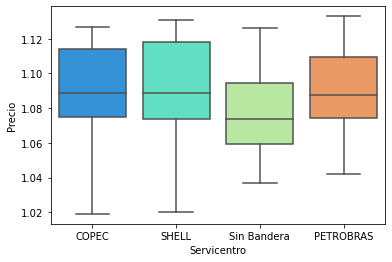

In [18]:
sns.boxplot(x='Servicentro',y='Precio',data=Selection,palette='rainbow')

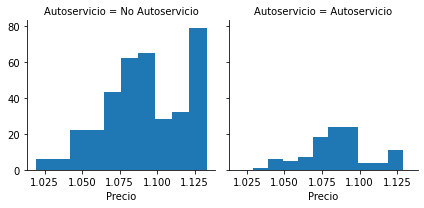

In [19]:
g = sns.FacetGrid(data=Selection,col='Autoservicio')
g.map(plt.hist,'Precio')

<AxesSubplot:xlabel='Comuna', ylabel='count'>

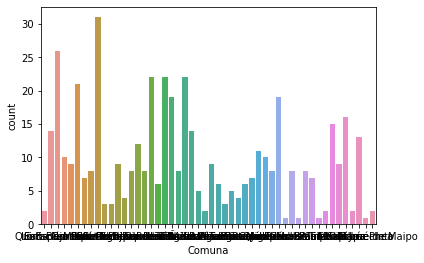

In [20]:
sns.countplot(x='Comuna',data=Selection)

<AxesSubplot:xlabel='Precio'>

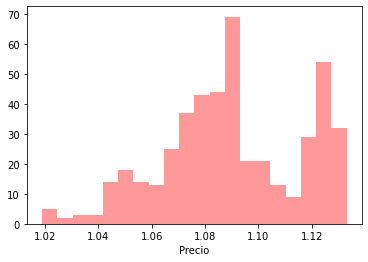

In [24]:
sns.distplot(Selection['Precio'],bins=20,kde=False,color='red')

<AxesSubplot:xlabel='Autoservicio', ylabel='Precio'>

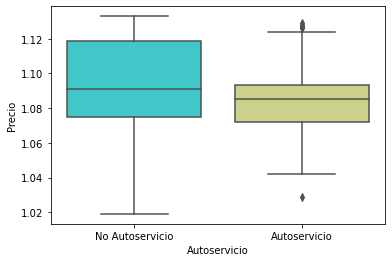

In [25]:
sns.boxplot(x='Autoservicio',y='Precio',data=Selection,palette='rainbow')

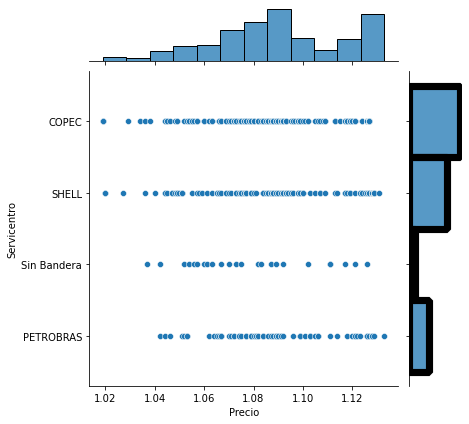

In [26]:
sns.jointplot(x='Precio',y='Servicentro',data=Selection)

Text(0.5, 1.0, 'Selection.corr()')

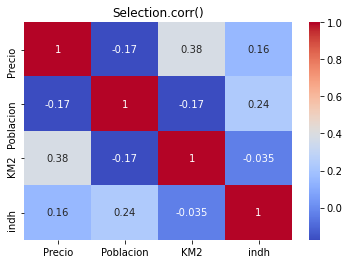

In [50]:
sns.heatmap(Selection.corr(),cmap='coolwarm',cbar=True, annot=True)
plt.title('Selection.corr()')

<AxesSubplot:xlabel='Servicentro', ylabel='Precio'>

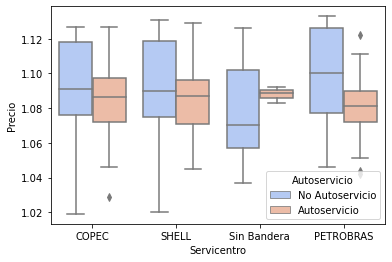

In [28]:
sns.boxplot(x="Servicentro", y="Precio", hue="Autoservicio",data=Selection, palette="coolwarm")

In [13]:
Selection.Groupby(Comuna)

AttributeError: 'DataFrame' object has no attribute 'Groupby'

In [16]:
Selection["Autoservicio"].value_counts()

No Autoservicio    365
Autoservicio       104
Name: Autoservicio, dtype: int64

In [17]:
Selection["Comuna"].value_counts()

Santiago               31
San Bernardo           26
Puente Alto            22
Ñuñoa                  22
Providencia            22
Maipú                  21
La Florida             19
Las Condes             19
Vitacura               16
Colina                 15
Quinta Normal          14
Peñalolén              14
Lo Barnechea           13
Independencia          12
San Joaquín            11
Estación Central       10
Quilicura              10
Cerrillos               9
Melipilla               9
Recoleta                9
Macul                   9
Conchalí                8
Buin                    8
Peñaflor                8
Talagante               8
La Reina                8
Huechuraba              8
Pudahuel                8
Paine                   7
La Cisterna             7
San Miguel              7
Renca                   6
Pedro Aguirre Cerda     6
Lampa                   6
Calera de Tango         5
La Pintana              5
San Ramón               4
El Bosque               4
Padre Hurtad

In [22]:
filtro = df["Comuna"] =="Santiago"
Selection.loc[filtro]["Servicentro"].value_counts()

COPEC          15
SHELL          11
PETROBRAS       4
Sin Bandera     1
Name: Servicentro, dtype: int64

In [29]:
Comuna_grp = Selection.groupby(["Comuna"])
Comuna_grp["Servicentro"].value_counts().head(60)

Comuna            Servicentro
Buin              COPEC           2
                  PETROBRAS       2
                  SHELL           2
                  Sin Bandera     2
Calera de Tango   COPEC           2
                  PETROBRAS       2
                  SHELL           1
Cerrillos         COPEC           3
                  SHELL           3
                  PETROBRAS       2
                  Sin Bandera     1
Cerro Navia       PETROBRAS       1
                  SHELL           1
                  Sin Bandera     1
Colina            COPEC           6
                  SHELL           6
                  PETROBRAS       3
Conchalí          PETROBRAS       3
                  SHELL           3
                  COPEC           2
Curacaví          COPEC           1
                  SHELL           1
El Bosque         COPEC           1
                  PETROBRAS       1
                  SHELL           1
                  Sin Bandera     1
El Monte          COPEC           

In [31]:
Comuna_grp["Precio"].mean()

Comuna
Buin                   1.124750
Calera de Tango        1.075600
Cerrillos              1.050778
Cerro Navia            1.065333
Colina                 1.125867
Conchalí               1.079375
Curacaví               1.113000
El Bosque              1.072750
El Monte               1.098000
Estación Central       1.050700
Huechuraba             1.114750
Independencia          1.069583
Isla de Maipo          1.108000
La Cisterna            1.075857
La Florida             1.091737
La Granja              1.076000
La Pintana             1.082800
La Reina               1.097875
Lampa                  1.112333
Las Condes             1.120895
Lo Barnechea           1.127462
Lo Espejo              1.066500
Lo Prado               1.075000
Macul                  1.086556
Maipú                  1.062190
María Pinto            1.119000
Melipilla              1.118111
Padre Hurtado          1.078333
Paine                  1.124286
Pedro Aguirre Cerda    1.093000
Peñaflor               1.060875
P

In [43]:
Comuna_grp["Precio"].agg(["median", "mean", "count"])

,median,mean,count
Comuna,,,
Buin,1.1270,1.124750,8
Calera de Tango,1.0760,1.075600,5
Cerrillos,1.0370,1.050778,9
Cerro Navia,1.0580,1.065333,3
Colina,1.1260,1.125867,15
Conchalí,1.0815,1.079375,8
Curacaví,1.1130,1.113000,2
El Bosque,1.0765,1.072750,4
El Monte,1.0980,1.098000,1


<AxesSubplot:xlabel='Precio', ylabel='Density'>

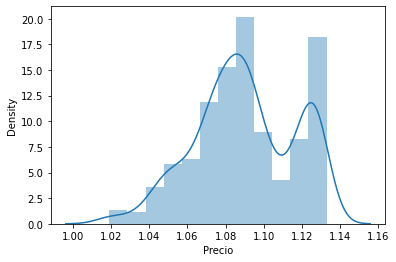

In [44]:
sns.distplot(Selection["Precio"])

<AxesSubplot:xlabel='indh', ylabel='Precio'>

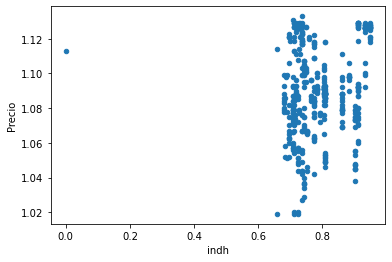

In [52]:
var= "indh"
data=Selection
data.plot.scatter(x=var, y="Precio")

In [47]:
cols=corrmat.nlargest(5,"Precio")["Precio"].index


ValueError: Could not interpret input 'indh nivel'

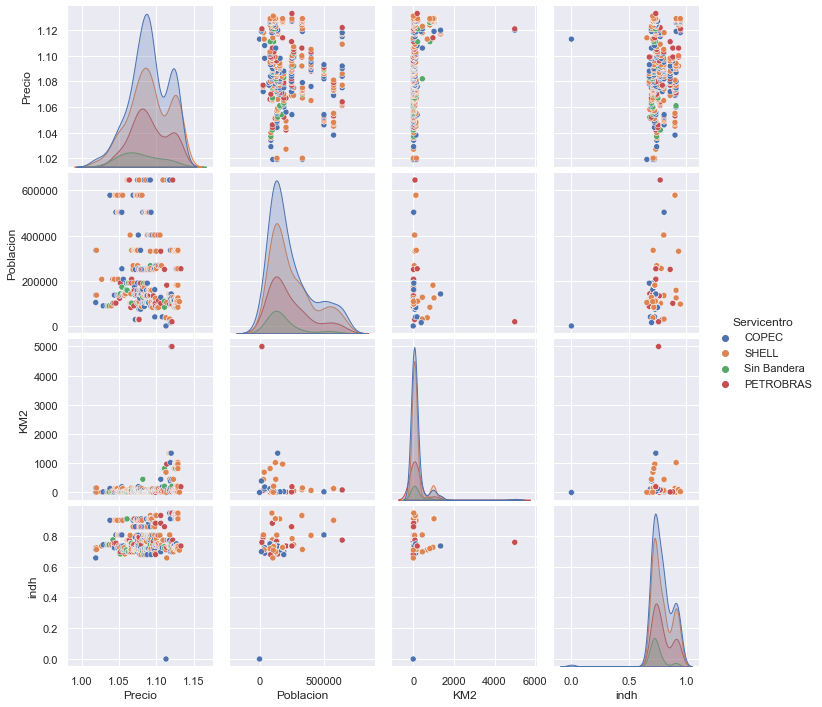

In [56]:
sns.set()
cols=["Servicentro","Autoservicio","Precio","Comuna","Poblacion","KM2","indh"]
sns.pairplot(Selection[cols],hue="Servicentro")